# Сборный проект

***О проекте:***

Исследование для магазина по продаже компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Даны данные до 2016 года. Планируется кампания на 2017-й.  
В наборе данных столбец raiting -  рейтинг ESRB (Entertainment Software Rating Board)

***План работы:***
- Ознакомление с данными(загрузка данных и ознакомление с общей структурой и содержанием набора данных, проверка наличия пропущенных значений, дубликатов и аномалий)
- Предварительный анализ данных(Изучение основных характеристик данных: средние, медианы, и тд, анализ категориальных переменных: подсчет количества уникальных значений и т.д) 
- Очистка данных(обработка пропущенных значений, обработка дубликатов и аномалий)
- Исследовательский анализ данных 
- Проверка гипотез
- Общий вывод

### Открываем файлы с данными и изучим общую информацию

#### Загрузка данных

In [1]:
# импортируем необходимые библиотеки:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# считаем CSV-файл с данными с помощью библиотеки pandas и сохраним в датафрейм
df_games_info = pd.read_csv('games.csv')

In [3]:
# функция для вывода информации о датафрейме

def df_info(dataset):
    # вывод первых 5 строк датафрейма
    print('Первые 5 строк датафрейма df_games_info')
    display(dataset.head())
    print("\n" + "="*80 + "\n")
    
    # вывод последних 5 строк датафрейма
    print('Последние 5 строк датафрейма df_games_info')
    display(dataset.tail())
    print("\n" + "="*80 + "\n")
    
    # вывод случайных 5 строк датафрейма
    print('Случайные 5 строк датафрейма df_games_info')
    display(dataset.tail())
    print("\n" + "="*80 + "\n")
    
    # информации о типах данных и количестве ненулевых значений в каждом столбце
    print('Информация о датафрейме')
    display(dataset.info())
    print("\n" + "="*80 + "\n")
    
    # проверка на явные дубликаты
    print("Проверка на явные дубликаты:")
    display(dataset.duplicated().sum())
    print("\n" + "="*80 + "\n")
    
    # проверка на пропущенные значения
    print("Проверка на пропущенные значения:")
    display(dataset.isnull().sum())
    print("\n" + "="*80 + "\n")
    
    # статистическое описание числовых столбцов
    print("Статистическое описание числовых столбцов:")
    display(dataset.describe())    

In [4]:
# применим функцию к датафрейму
df_info(df_games_info)

Первые 5 строк датафрейма df_games_info


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN




Последние 5 строк датафрейма df_games_info


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN




Случайные 5 строк датафрейма df_games_info


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN




Информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None



Проверка на явные дубликаты:


0



Проверка на пропущенные значения:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64



Статистическое описание числовых столбцов:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
# сохраним количество строк исходного датафрейма в переменную 
num_lines = df_games_info.shape[0]
num_lines

16715

### Подготовка данных

#### Приведение названия столбцов к нижнему регистру

In [6]:
# приведем названия столбцов к нижнему регистру
df_games_info.columns = [col.lower() for col in df_games_info.columns]

# проверим результат
df_games_info.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Пропущенные значения и изменения типа данных столбцов

***столбцы genre и name***

При проверке на пропущенные значения в столбцах name и genre имеем по два пропуска. Рассмотрим строки датафрейма

In [7]:
df_games_info[df_games_info['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки с пропусками в name и genre совпадают. Восстановить или заполнить эти пропуски не представляется возможным - просто удалим

In [8]:
# удалим две строки с пропусками в name и genre
#df_games_info = df_games_info.drop(index=[659, 14244]).reset_index(drop=True)

In [9]:
# удалим две строки с пропусками в name и genre
df_games_info = df_games_info.dropna(subset=['name', 'genre']).reset_index(drop=True)

In [10]:
# проверим результат
print(f'Было строк {num_lines}')
print(f'Стало строк {df_games_info.shape[0]}')

Было строк 16715
Стало строк 16713


***столбец year_of_release***

Рассмотрим пропущенные значения в столбце year_of_release. Пропущено 269 значений. В целом так как вся имеющаяся у нас информация по условию задания взята из открытых источников, то мы можем заполнить пропуски самостоятельно на различных ресурсах в сети. Также так как строк с пропущенными значениями в этом столбце ничтожно мало (около 1.5%) можем их просто удалить

In [11]:
# удалим строки с пропусками в столбце year_of_release и сбросим индекс
df_games_info = df_games_info.dropna(subset=['year_of_release']).reset_index(drop=True)

In [12]:
# изменим тип данных столбца df_games_info на integer
df_games_info['year_of_release'] = df_games_info['year_of_release'].astype(int)

In [13]:
# найдем минимальный и максимальный год релиза игр

min_year = df_games_info['year_of_release'].min()
max_year = df_games_info['year_of_release'].max()

f'Данные по релизам игр за период с {min_year} по {max_year}'

'Данные по релизам игр за период с 1980 по 2016'

***столбец critic_score***

В данном столбце пропущено около 50% значений. Восстановить данные не представляется возможным, тк мы не знаем источник, удалять половину датасета тоже нельзя. Минимальное значение по имеющимся данным = 13. Оставим пропуски как есть.

***столбец rating***

In [14]:
# уникальные значения столбца rating
df_games_info['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
df_games_info['rating'].isna().sum()


6676

В столбце raiting (рейтинг игр по версии ESRB) имеем 6676 строк с пропущенными значениями. ESRB - это организация, которая присваивает рэйтинг видеоиграм в США И Канаде. Соответственно пропуски в данной колонке могут свидетельствовать о том, что игра еще не получила рейтинг, игра была выпущена не для рынка США и Канады. Это наверное важнейший столбец из представленных рейтингов. Оставим на данном этапе пропуски как есть. В последствии при необходимости заменим пустые значения  на 'Unknown'

***столбец user_score***

In [16]:
# рассмотрим уникальные значения столбца user_score
df_games_info['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd скорее всего это аббревиатура от английского выражения «To Be Determined», что означает «Будет определено», соответственно рейтинга еще нет. заменим данное значение на пустое

In [17]:
# заменим значение tbd на 0
#df_games_info['user_score'] = df_games_info['user_score'].replace('tbd', 0)

In [18]:
# изменим тип данных столбца на float
#df_games_info['user_score'] = df_games_info['user_score'].astype(float)

In [19]:
# преобразуем тип данных столбца user_score в чмсловой
df_games_info['user_score'] = pd.to_numeric(df_games_info['user_score'], errors='coerce')
df_games_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


#### Поиск неявных дубликатов

Так как некоторые игры выпускаются на разных платфоормах и переиздаются по прошествии некоторого времени проверим на дубликаты связку столбцов 'name', 'platform', 'year_of_release'

In [20]:
# проверка на дубликаты по трем столбцам
df_games_info[df_games_info.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [21]:
# удалим строку дубликат
df_games_info = df_games_info.drop_duplicates(subset=['name', 'platform', 'year_of_release']
                                              , keep='first').reset_index(drop=True)

In [22]:
# рассмотрим уникальные значения в столбце platform
df_games_info['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [23]:
# рассмотрим уникальные значения в столбце genre
df_games_info['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**явных/неявных дубликатов в столбцах platform и genre не выявлено**

#### Сумарные продажи во всех регионах

In [24]:
# создание нового столбца с сумарными продажами
df_games_info['total_sales'] = (df_games_info['na_sales'] + df_games_info['eu_sales'] + 
                                df_games_info['jp_sales'] + df_games_info['other_sales'])

In [25]:
# проверим результат
df_games_info.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [26]:
# общие продажи по регионам за 2014-2016 года
df_games_info.query('year_of_release > 2013')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

na_sales       284.06
eu_sales       270.68
jp_sales        93.09
other_sales     81.62
dtype: float64

### Исследовательский анализ данных

#### Количество игр, выпущенных в разные годы

In [27]:
# подсчет количества игр по годам
game_count_years = df_games_info.groupby('year_of_release').size().reset_index(name='game_count')

game_count_years

,year_of_release,game_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Построим столбчатую диаграмму для наглядности распределения релизов игр по годам

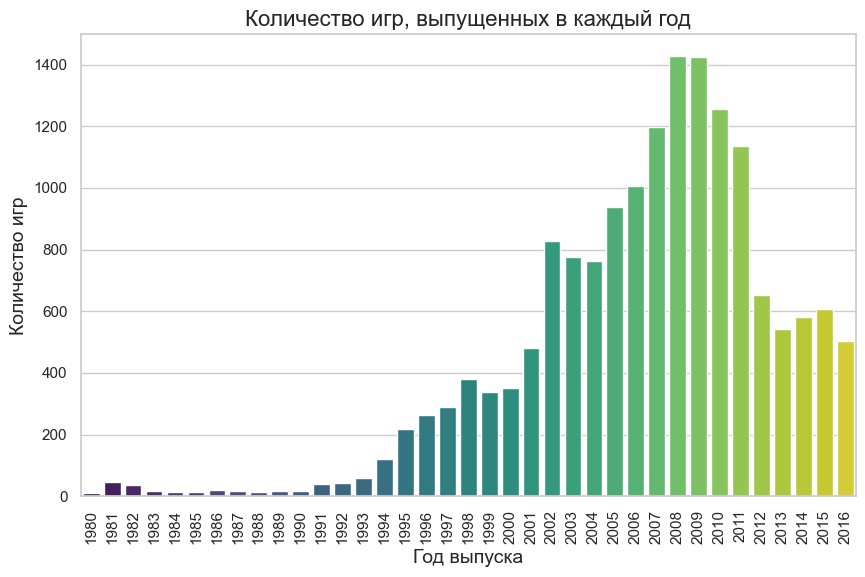

In [28]:
# настройка стиля seaborn
sns.set(style="whitegrid")

# создание графика
plt.figure(figsize=(10, 6))
sns.barplot(x='year_of_release', y='game_count', data=game_count_years, palette='viridis')

# добавление заголовка и названий осей
plt.title('Количество игр, выпущенных в каждый год', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)

# поворот подписей оси X
plt.xticks(rotation=90)

plt.show()

Рост релизов игр начинается с 1994 года, когда на рынок выходит PlayStation, пик релизов приходится на 2008 - 2009 год, так как в этот период на рынок были выпущены консоли PlayStation 3 и Xbox 360, которые стали популярными игровыми платформами и привлекли большое количество игроков. Данные за все периоды не очень важны, тк игровая индустрия развивается стремительно, выходят новые версии консолей, развивается мобильный гейминг, сервисы вводят подписки, благодаря которым пользователю нет необходимости покупать конкретную игру, а можно купить сразу пакетом.

Посчитаем примерную среднюю продолжительность жизни платформы по имеющимся у нас данным

In [29]:
df_games_info.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [30]:
# определим топ-10 платформ по продажам
top_10 = df_games_info.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False) \
                                                         .head(10).to_frame().reset_index()

top_10

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [31]:
# отфильтруем исходный датафрейм оставив информацию только для топ 10 платформ
df_games_top_10 = df_games_info[df_games_info['platform'].isin(top_10['platform'])]

# проверим значения столбца platform в новом датафрейме
df_games_top_10['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'PS',
       'PSP'], dtype=object)

In [32]:
# посчитаем первый и последний релиз для каждой платформы по нашим данным
platform_summary = df_games_top_10.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

# добавим столбец с сроком жизни для каждой платформы
platform_summary['live'] = platform_summary['max'] - platform_summary['min']

# средняя продолжительность жизни платформы
result = platform_summary['live'].mean().round(1)

print(f'Средняя продолжительность жизни платформы - {result} лет')

Средняя продолжительность жизни платформы - 10.5 лет


#### Изменение продаж по платформам

Так как рынок гейминга интенсивно меняется и для прогнрозирования будущих продаж нам врядли подойдут старые данные, найдем топ 10 платформ с максимальными продажами за последние 3 года (с 2014 по 2016 гг). Это даст нам более свежую картину на сегодняшний день, чем анализ данных за весь имеющийся период

In [33]:
# создадим новый датафрейм с данными за последние 3 года
data_filtred1 = df_games_info.query('year_of_release >= 2014')

In [34]:
# 10 платформ с наибольшими продажами
platform_order = data_filtred1.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index().head(10)
platform_order

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


Построим график для изменения продаж по годам. Для наглядности разобьем на две группы. Первая группа - 1-3 место платформ по количеству продаж. Вторая группа - 4-9 место по количеству продаж. Исключим платформу PSP из-за низкого количества продаж и тк по нашим данным последний релиз игры был в 2015 году. Врядли данная платформа будет представлять для нас интерес 

In [35]:
# создадим датафрейм с первой группой платформ
data_final1 = data_filtred1.query('platform in ["PS4", "XOne", "3DS"]')

# создадим датафрейм со второй группой платформ
data_final2 = data_filtred1.query('platform in ["PS3", "X360", "WiiU", "PC", "PSV", "Wii"]')


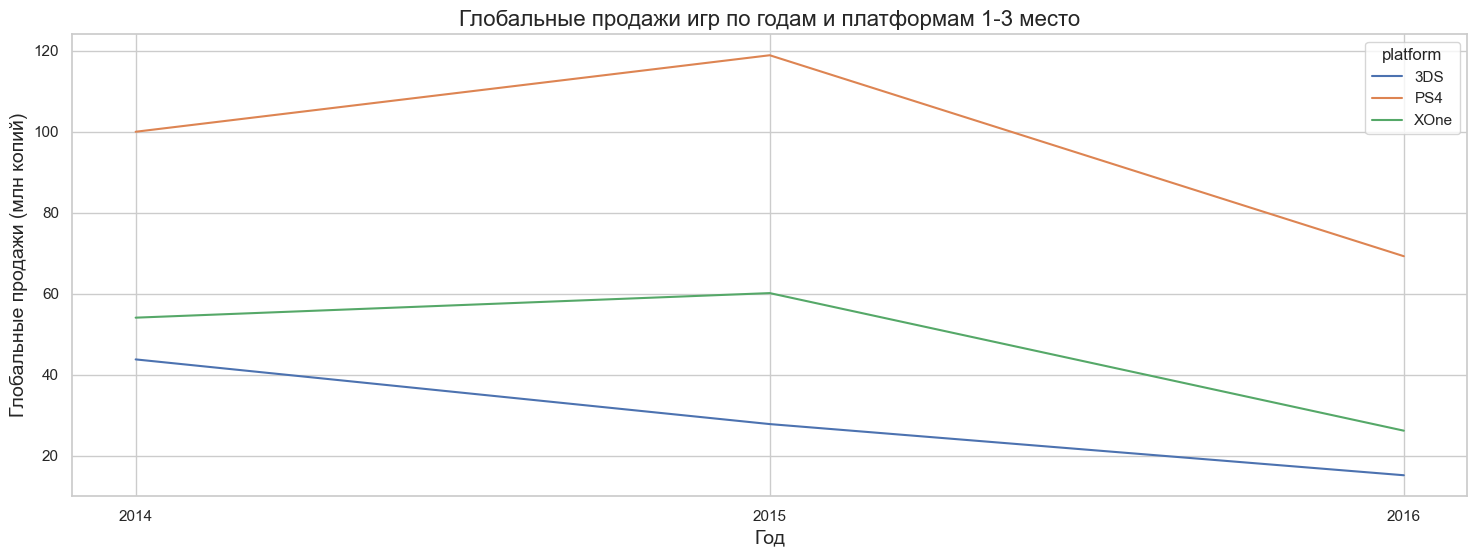

In [36]:
# посчитаем количество продаж для первых трех платформ по годам и построим график
data_final1.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
    .plot(figsize=(18,6))

# Установка позиций меток
plt.xticks(ticks=[2014, 2015,2016])

# подписи
plt.title('Глобальные продажи игр по годам и платформам 1-3 место',fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Глобальные продажи (млн копий)', fontsize=14)
plt.grid(True)

plt.show()

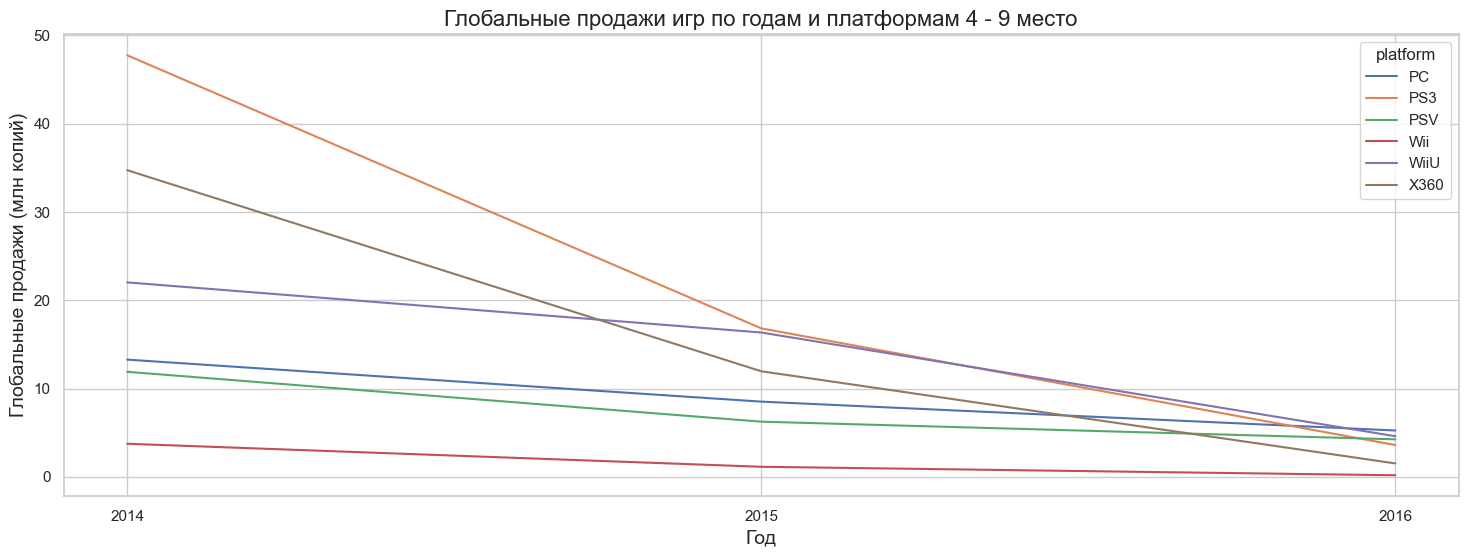

In [37]:
# посчитаем количество продаж для оставшихся платформ по годам и построим график
data_final2.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
    .plot(figsize=(18,6))

# Установка позиций меток
plt.xticks(ticks=[2014, 2015,2016])

# подписи
plt.title('Глобальные продажи игр по годам и платформам 4 - 9 место',fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Глобальные продажи (млн копий)', fontsize=14)
plt.grid(True)

plt.show()

Из графиков выше видно что в 14 году начинают резко падать продажи игр PS3 и расти продажи игр PS4 (в 2013 году состоялся релиз PS 4). Аналогичная ситуация с Х360 и ХOne (релиз ХOne также в 13 году) третье место занимает платформа 3DS (Nintendo 3DS - складная портативная консоль производства Nintendo) На графиках также отчетливо видна общая тенденция со снижением продаж по всем платформам. Если лидеры PS4 и XOne еще показывали умеренны рост до 2015 года, то остальные платформы однозначно снижаются. Потенциально прибыльные платформы PS4 и XOne, тк  данные платформы на данный момент популярны у пользователей ( о чем говорит самое большое количество проданных копий игр)

#### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

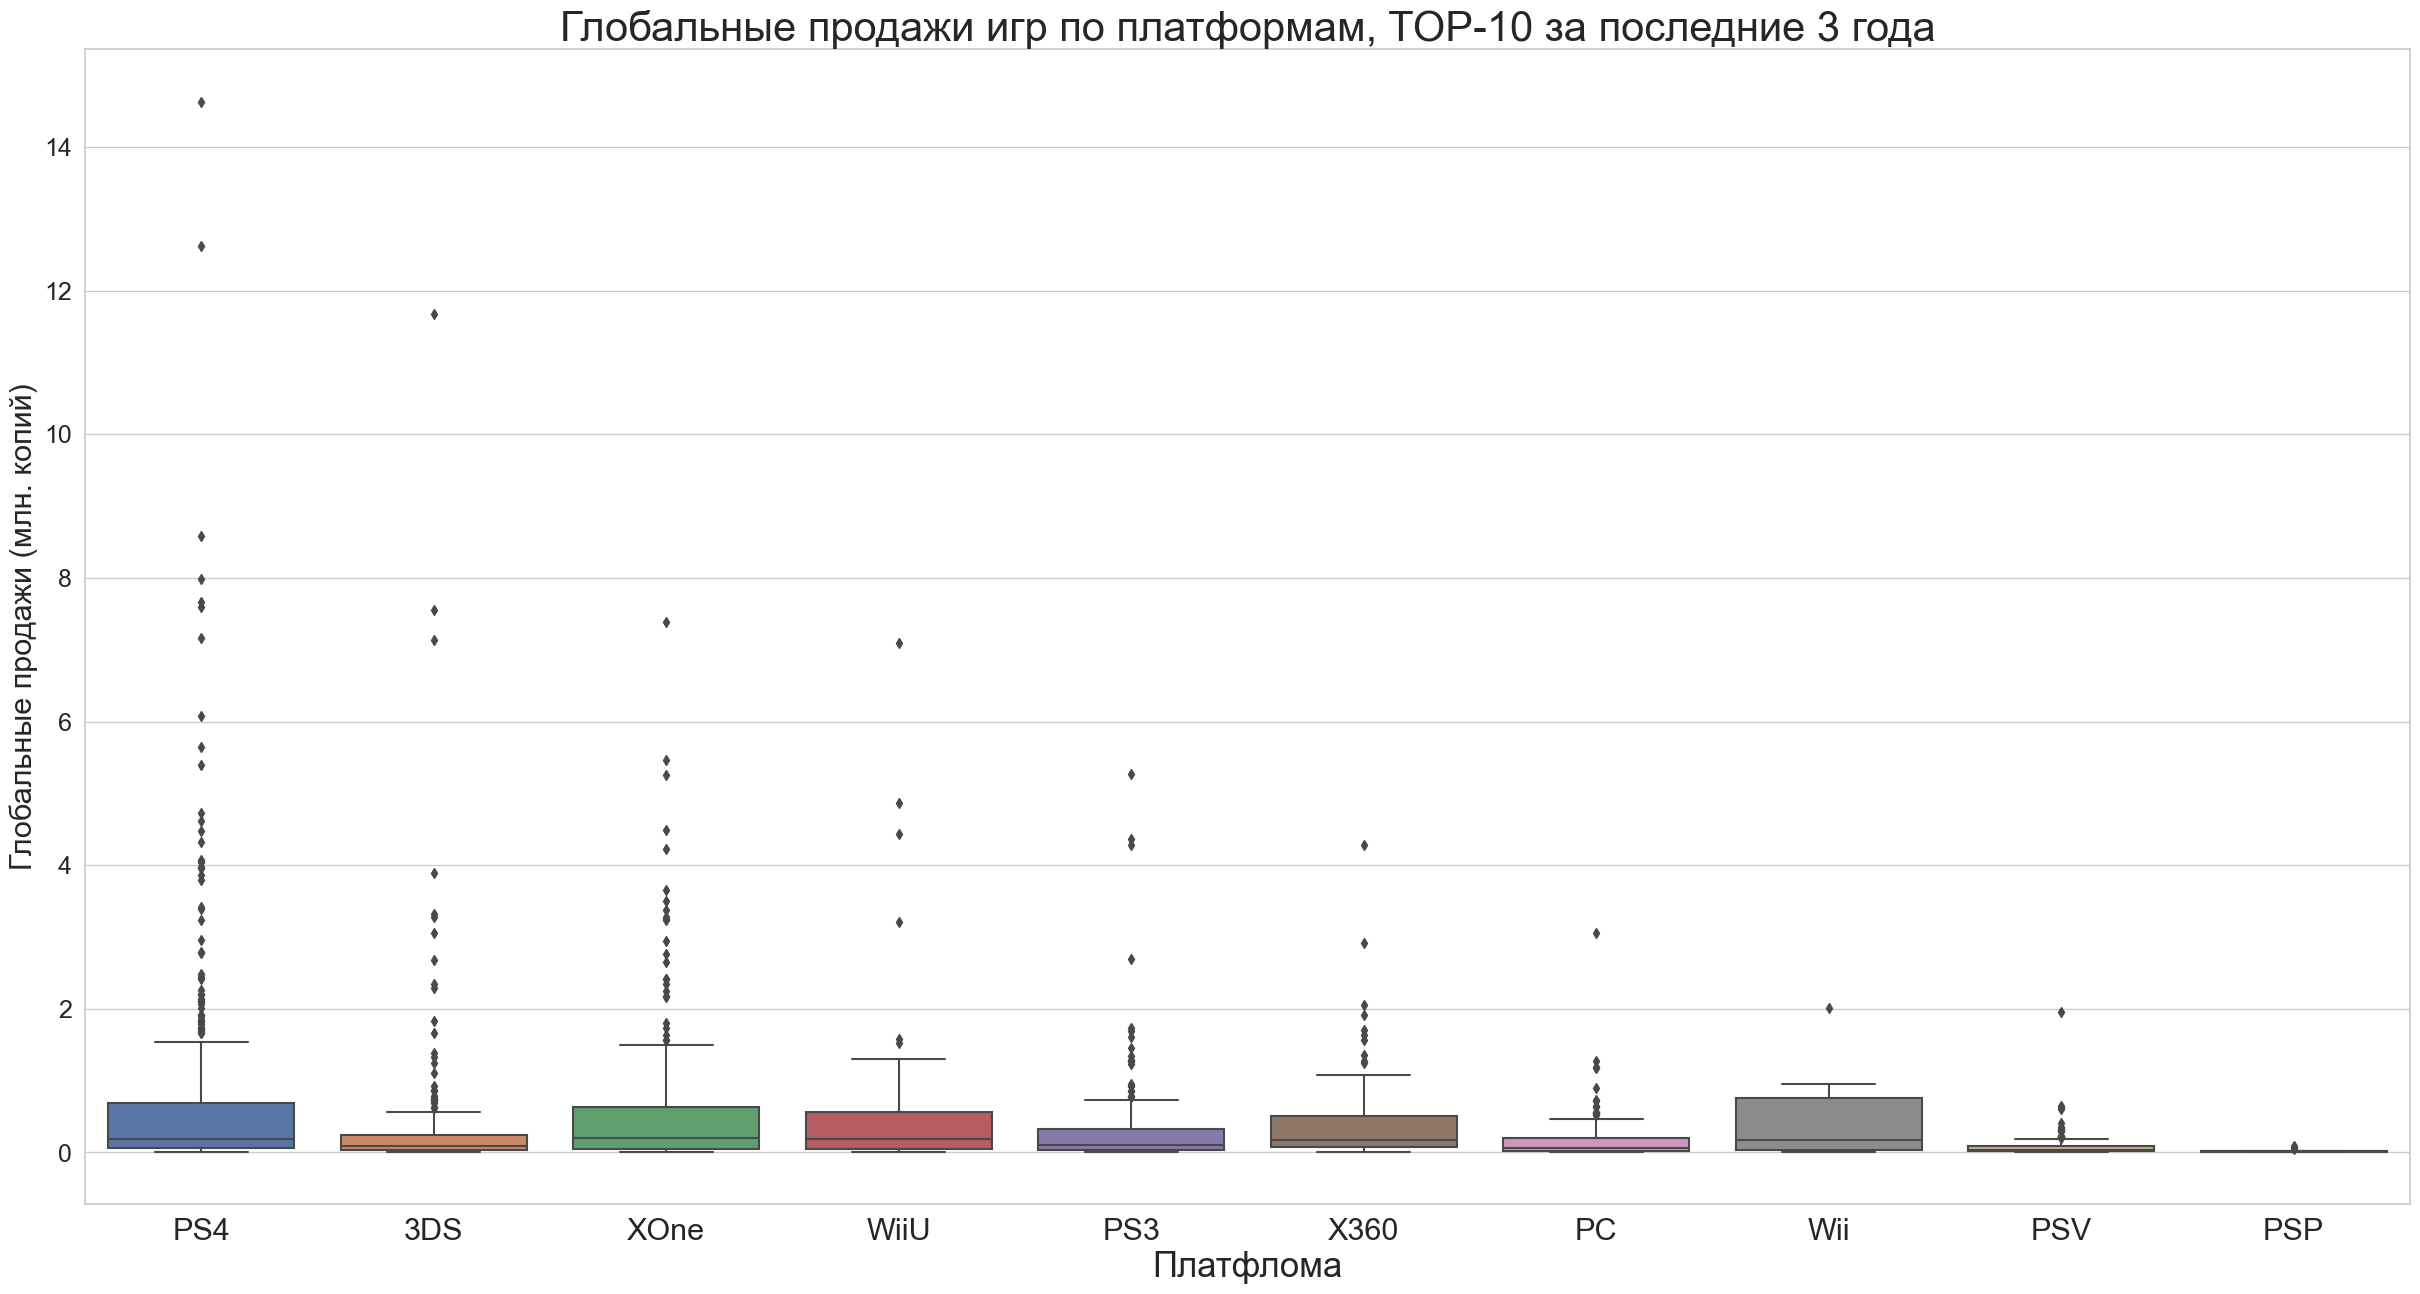

In [38]:
# построим boxplot для первой тройки лидеров по продажам
plt.figure(figsize=(30, 15))
sns.boxplot(x='platform', y='total_sales', data=data_filtred1)

# Настройка внешнего вида графика
plt.title('Глобальные продажи игр по платформам, TOP-10 за последние 3 года', fontsize=30)
plt.xlabel('Платфлома', fontsize=25)
plt.ylabel('Глобальные продажи (млн. копий)', fontsize=22)

# Настройка шрифта значений на осях
plt.xticks(fontsize=22)
plt.yticks(fontsize=18)

# Отображение графика
plt.show()

На данном графике мы видим выбросы для каждой платформы. В данном случае выбросы - это суперуспешные игры которые продаются гораздо лучше остальных игр данной платформы. По сути игры - хиты. Очень хорошо видно что по играм-хитам лидируют PS4 3DS и XOne. Также можно заметить что предыдущие поколения приставок Плэйстэйшн и Иксбокс также выпустили достаточное количество успеных игр. Что еще раз подчеркивает перспективность данных двух платформ.

Теперь отбросим суперуспешные игры и ознакомимся с графиком повторно.

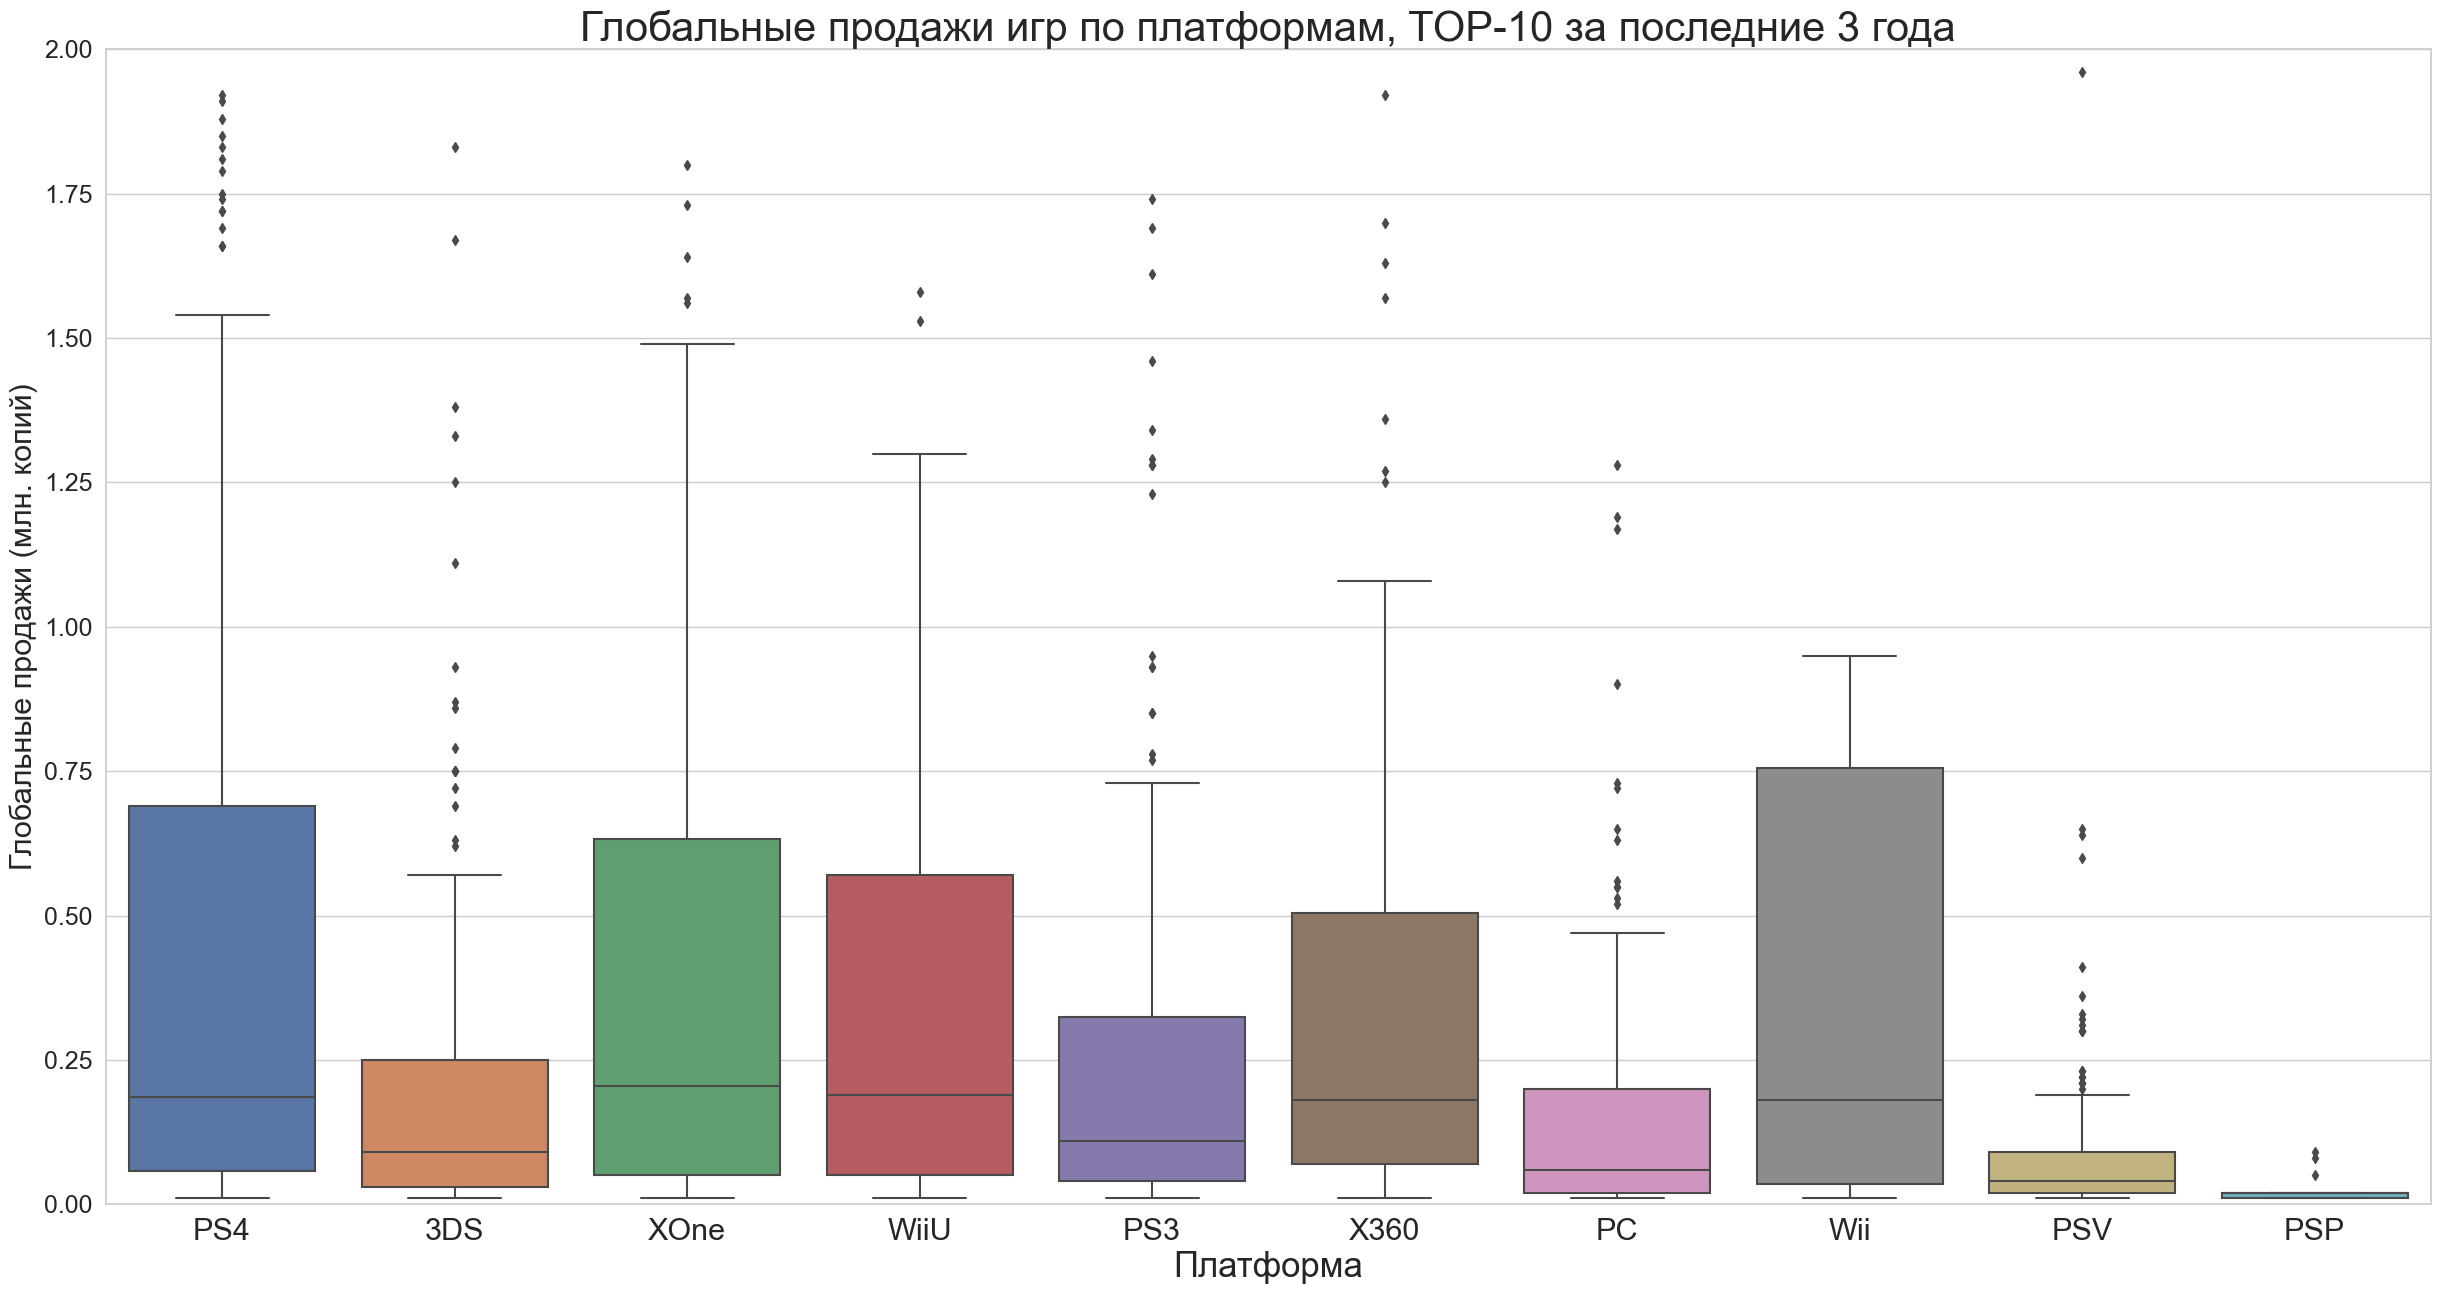

In [39]:
# создание boxplot 
plt.figure(figsize=(30, 15))
sns.boxplot(x='platform', y='total_sales', data=data_filtred1)

# подписи
plt.title('Глобальные продажи игр по платформам, TOP-10 за последние 3 года', fontsize=30)
plt.xlabel('Платформа', fontsize=25)
plt.ylabel('Глобальные продажи (млн. копий)', fontsize=22)

# Настройка шрифта значений на осях
plt.xticks(fontsize=22)
plt.yticks(fontsize=18)

plt.ylim(0,2)

plt.show()

Из графика видно что медианы продаж всех платформ смещены к первому квартилю. Смещение медианы к первому квартилю указывает на то, что половина всех продаж для каждой платформы находится в диапазоне низких значений. Длинный правый хвост у некоторых платформ говорит о том что небольшое количество игр значительно увеличивают общие продажи данной платформы

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

In [40]:
# Выберем самую популярную платформу PS4
data_top_platform = data_filtred1.query('platform == "PS4"')
data_top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Для дальнейших исследований определим функцию, результатом которой будет построения графиков рассеивания для total sales и user_score\critic_score а также расчет коэффициента корреляции Пирсона для этих величин

In [41]:
# определим функцию
def plot_sales_vs_scores(data):
    """
    
    Данная функция строит графики зависимости продаж от рейтинга критиков и пользователей, 
    а также выводит корреляцию между продажами и рейтингами'
    
    Параметр функции - датафрейм со столбцами total_sales, critic_score, user_score
    """
    
    # Вычисление корреляции
    critic_corr = data['total_sales'].corr(data['critic_score'])
    user_corr = data['total_sales'].corr(data['user_score'])
    
    
    print(f"Корреляция между продажами и рейтингом критиков: {critic_corr:.2f}")
    print(f"Корреляция между продажами и рейтингом пользователей: {user_corr:.2f}")
    
    
    # создание фигуры и подграфиков
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # первый график - зависимость продаж от рейтинга критиков
    sns.scatterplot(x='critic_score', y='total_sales', data=data_top_platform, ax=axes[0])
    axes[0].set_title('Зависимость продаж от рейтинга критиков', fontsize=18)
    axes[0].set_xlabel('Рейтинг (критики)', fontsize=14)
    axes[0].set_ylabel('Количество проданых копий, млн', fontsize=14)

    # второй график - зависимость продаж от рейтинга пользователей
    sns.scatterplot(x='user_score', y='total_sales', data=data_top_platform, ax=axes[1])
    axes[1].set_title('Зависимость продаж от рейтинга пользователей', fontsize=18)
    axes[1].set_xlabel('Рейтинг (пользователи)', fontsize=14)
    axes[1].set_ylabel('Количество проданых копий, млн', fontsize=14)

    # отображение графиков
    plt.tight_layout()
    plt.show()
    

Корреляция между продажами и рейтингом критиков: 0.40
Корреляция между продажами и рейтингом пользователей: -0.04


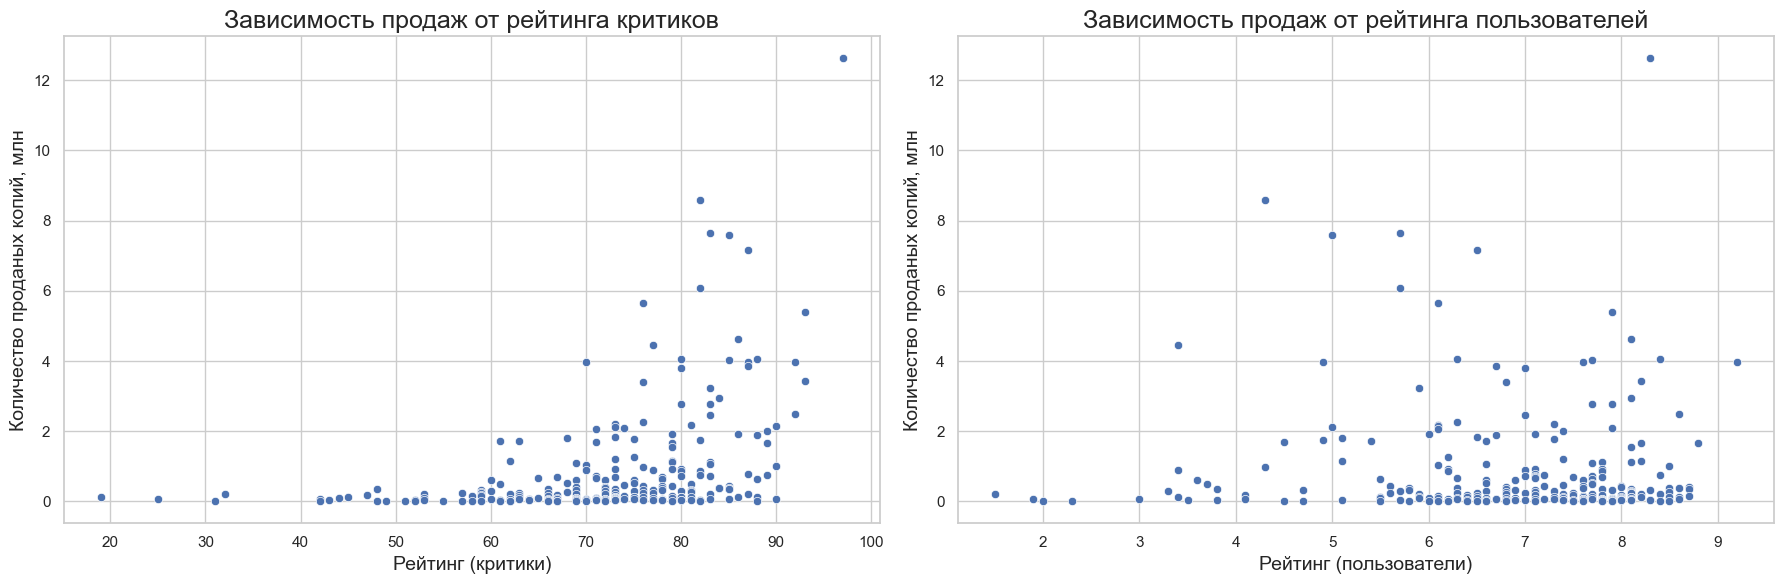

In [42]:
plot_sales_vs_scores(data_top_platform)

По итогу имеем коэфициент Пирсона равный 0.21 и 0.02. Это говорит о том, что в первом случае (отзывы критиков) существует слабая положительная зависимость между величиной глобальных продаж и отзывами. Тоесть игры, у которых высокий рейтинг в среднем продаются чуть лучше чем с низким, но эта связь очень незначительна. Во втором случае (отзывы пользователей) имеем отсутствие линейной зависимости. Изменения продаж не связаны линейно с величиной рейтинга пользователей.

Посмотрим на четыре оставшиеся платформы из TOP-5 по глобальным продажам.

In [43]:
# выберем платформу XOne
data_XOne_platform = data_filtred1.query('platform == "XOne"')

Корреляция между продажами и рейтингом критиков: 0.43
Корреляция между продажами и рейтингом пользователей: -0.07


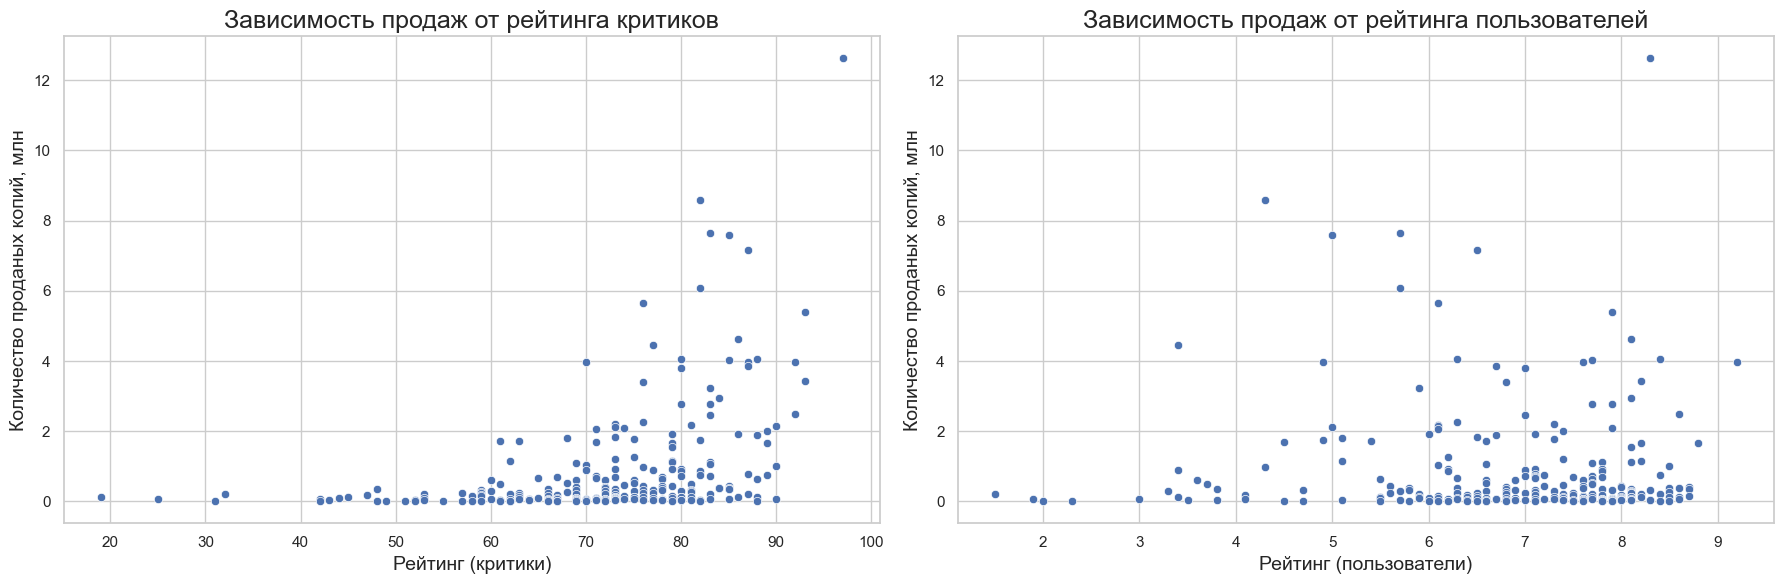

In [44]:
plot_sales_vs_scores(data_XOne_platform)

В данном слеучае видим  слабую линейную зависимость от отзывов критиков и также отсутствие зависимости от отзывов пользователей

In [45]:
# выберем платформу 3DS
data_3DS_platform = data_filtred1.query('platform == "3DS"')

Корреляция между продажами и рейтингом критиков: 0.31
Корреляция между продажами и рейтингом пользователей: 0.22


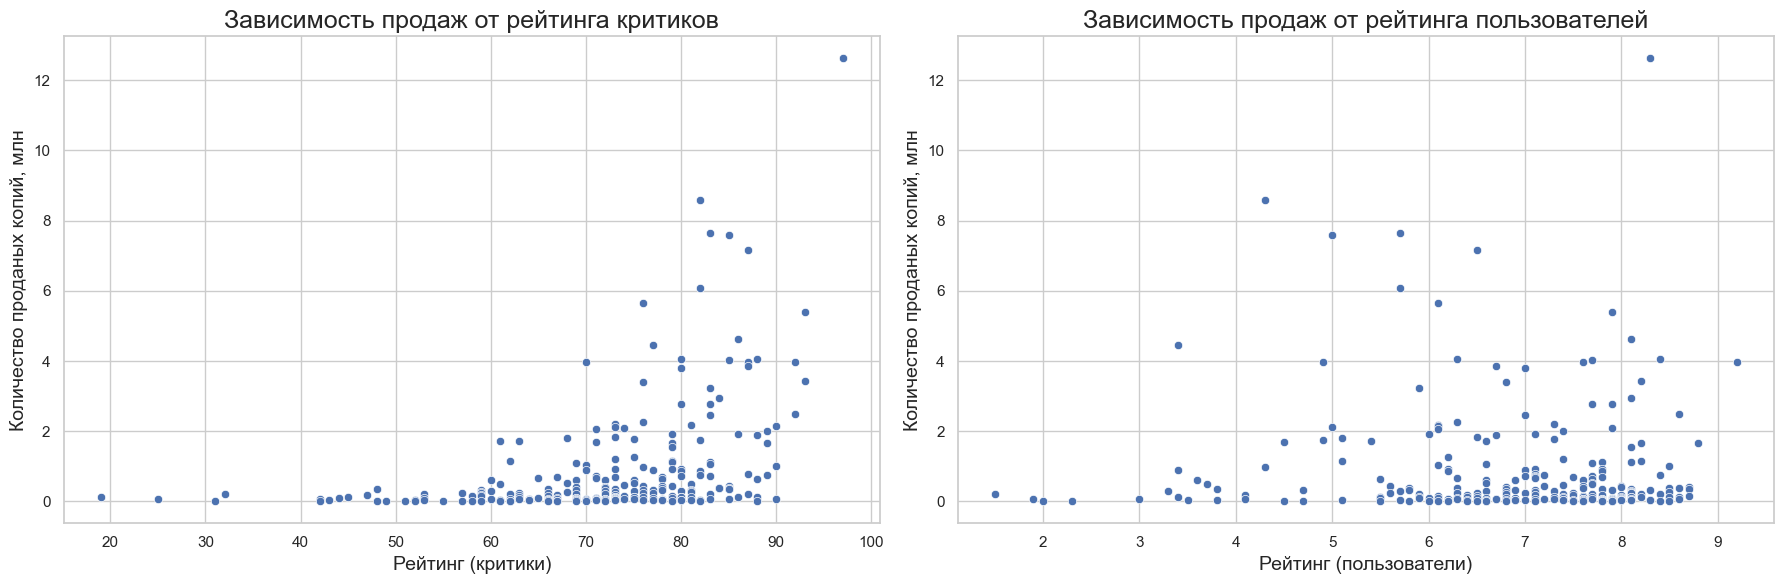

In [46]:
plot_sales_vs_scores(data_3DS_platform)

Для платформы 3DS видна слабая линейная зависимость как от отзывов критиков так и от отзывов пользователей

In [47]:
# выберем платформу PS3
data_PS3_platform = data_filtred1.query('platform == "PS3"')

Корреляция между продажами и рейтингом критиков: 0.45
Корреляция между продажами и рейтингом пользователей: -0.17


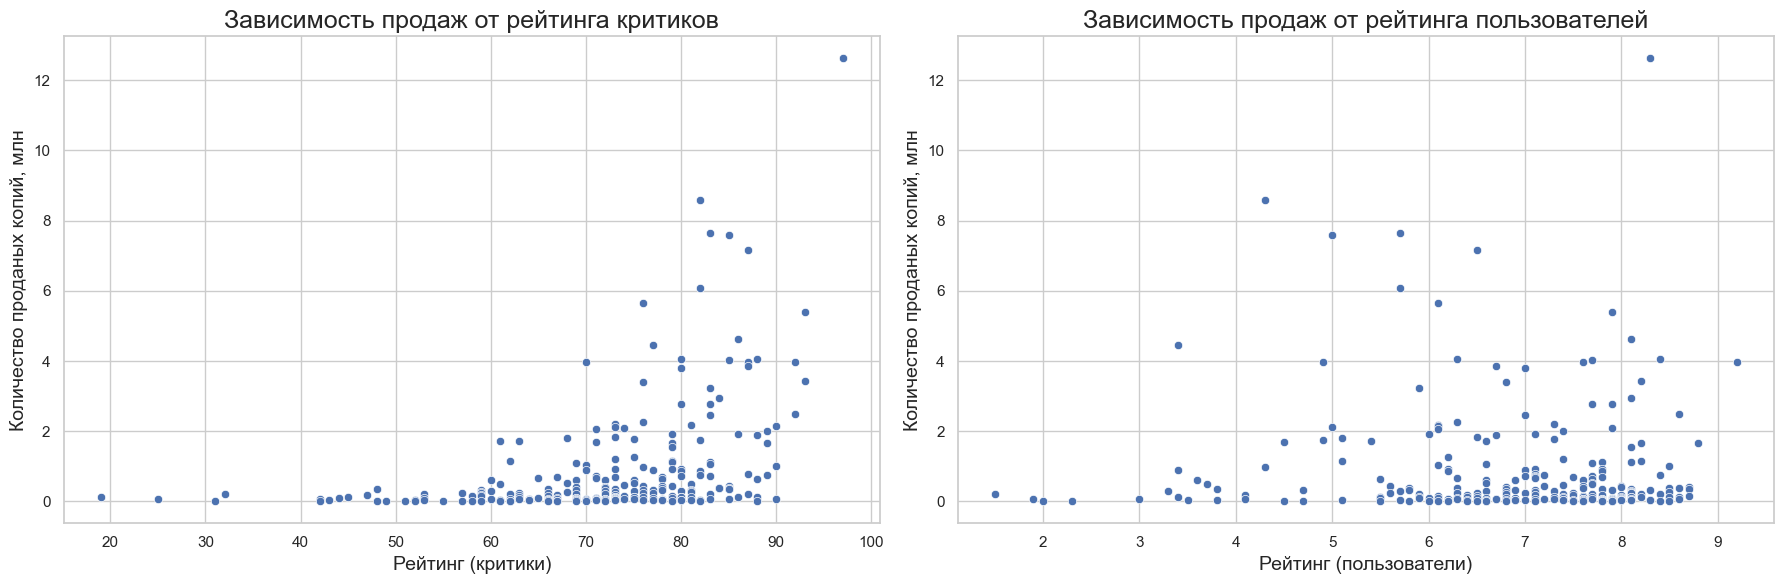

In [48]:
plot_sales_vs_scores(data_PS3_platform)

В данном слеучае видим  слабую линейную зависимость от отзывов критиков и также отсутствие зависимости от отзывов пользователей

In [49]:
# выберем платформу PS3
data_X360_platform = data_filtred1.query('platform == "X360"')

Корреляция между продажами и рейтингом критиков: 0.53
Корреляция между продажами и рейтингом пользователей: -0.14


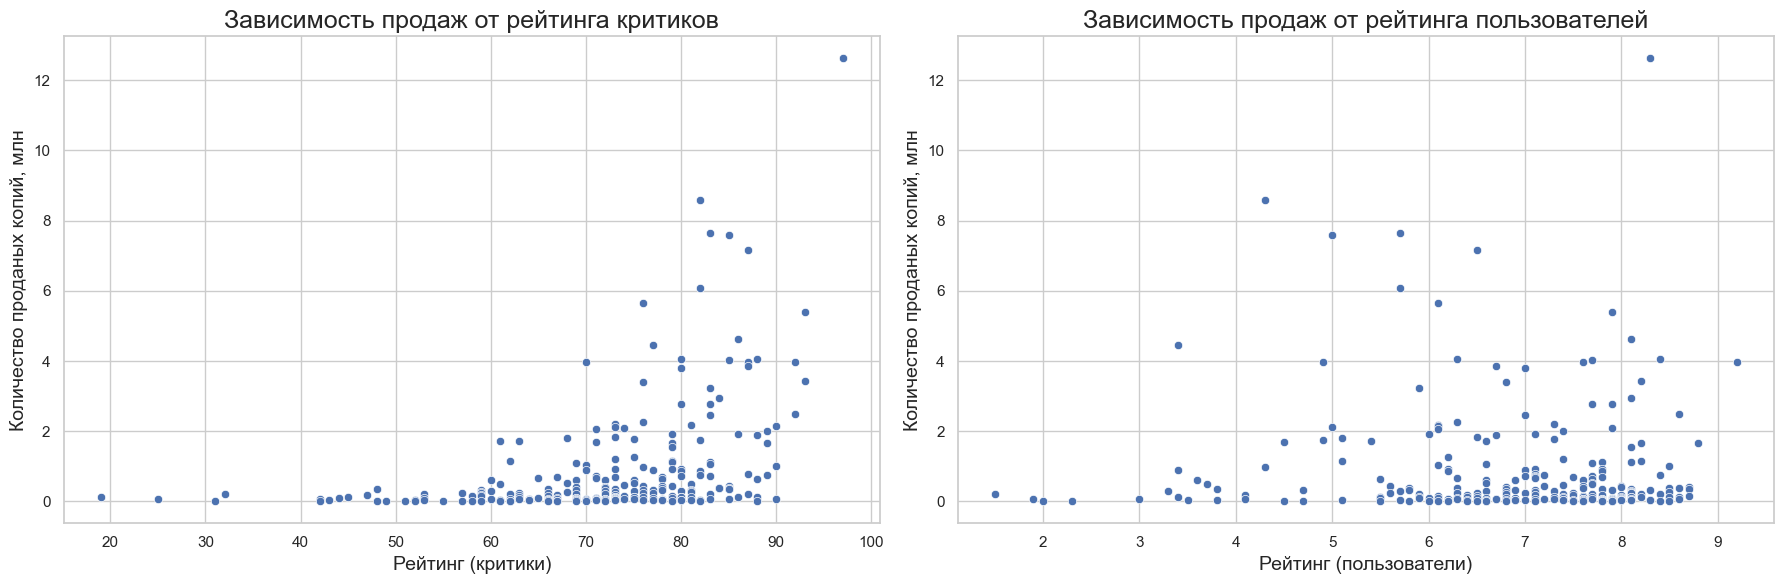

In [50]:
plot_sales_vs_scores(data_X360_platform)

В данном слеучае видим  слабую линейную зависимость от отзывов критиков и также отсутствие зависимости от отзывов пользователей

В целом по данным платформам можно сделать вывод нет линейной зависимости между продажами игр и рейтингом пользователей и есть слабая линейная зависимость от рейтингов критиков

#### Общее распределение игр по жанрам, самые прибыльные жанры.

In [51]:
# посчитаем общие продажи для каждого жанра а также среднее и медианное значени
platform_total_sales = data_filtred1.groupby('genre')['total_sales'].agg(['sum', 'mean','median']).round(2)
platform_total_sales = platform_total_sales.sort_values(by='sum', ascending=False)
platform_total_sales['final_parametr'] = (platform_total_sales['mean'] + platform_total_sales['median']) / 2
platform_total_sales

,sum,mean,median,final_parametr
genre,,,,
Action,199.36,0.32,0.09,0.205
Shooter,170.94,1.34,0.52,0.930
Sports,109.48,0.68,0.18,0.430
Role-Playing,101.44,0.46,0.11,0.285
Misc,37.55,0.33,0.09,0.210
Fighting,28.22,0.47,0.12,0.295
Racing,27.52,0.40,0.09,0.245
Platform,18.09,0.48,0.14,0.310
Adventure,17.55,0.09,0.03,0.060


Text(0, 0.5, 'Продано копий (млн. шт.)')

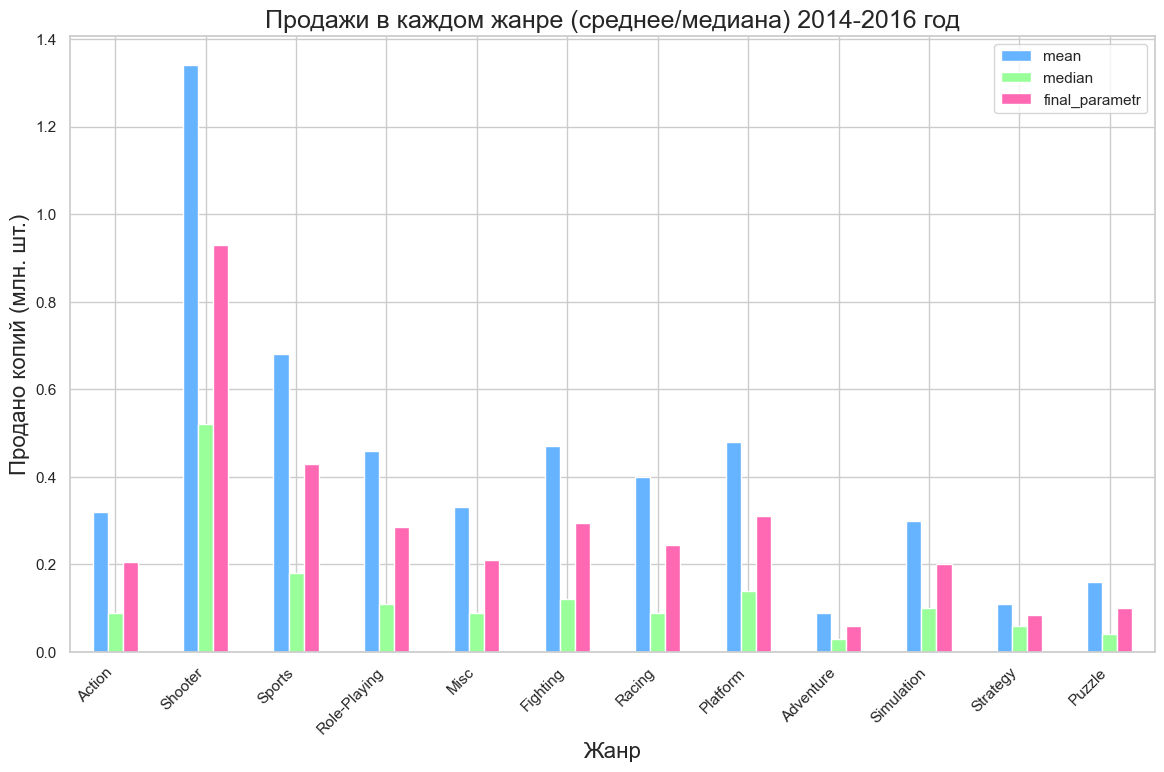

In [52]:
# построим столбчатую диаграмму для этих значений
ax = platform_total_sales[['mean', 'median', 'final_parametr']].plot.bar(color=['#66b3ff','#99ff99','#FF69B4'] 
                                                                         , figsize=(14, 8))


# настройка подписей под барами
plt.xticks(rotation=45, ha='right')

# заголовки
plt.title('Продажи в каждом жанре (среднее/медиана) 2014-2016 год', fontsize=18)
plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Продано копий (млн. шт.)', fontsize=16)


На графике отчетливо видно что средние и медианные продажи выше у жанра Shooter. Тоесть подробнее в среднем каждая игра этой платформы продается большим количеством экземпляров, основная масса игр продается количеством экземпляров больше чем у конкурентов. Второе место у платформы Sports. Самые низкие продажи у платформ Adventure, Strategy, Puzzle.

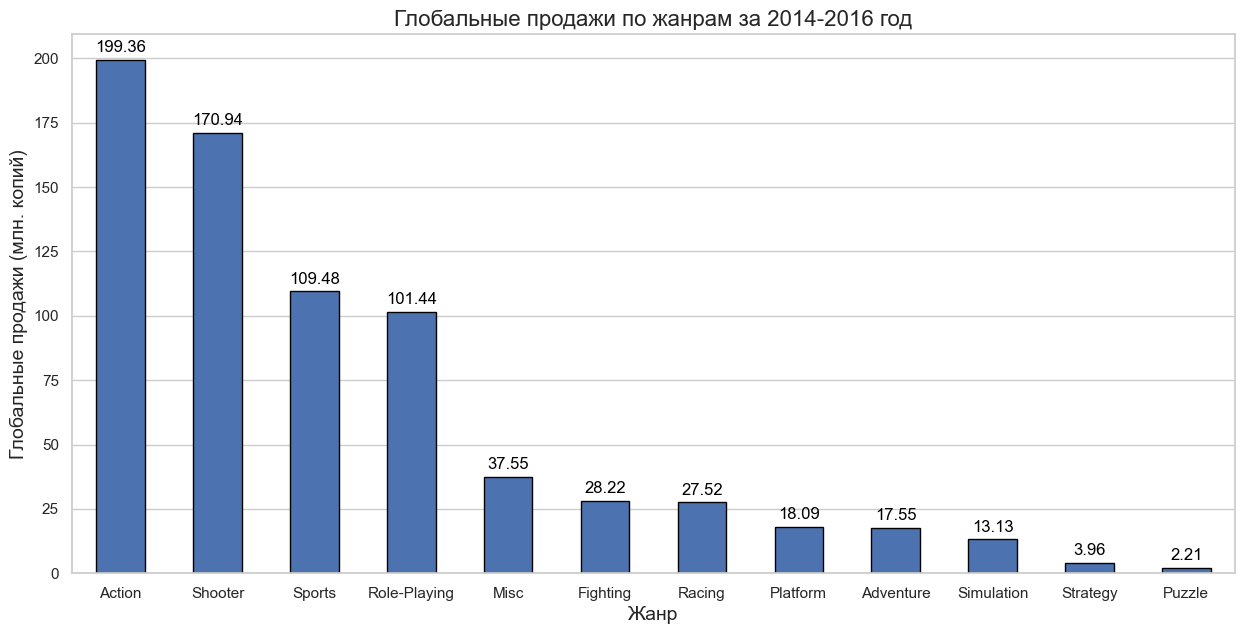

In [53]:
# построим столбчатую диаграмму для продаж по каждому жанру
plt.figure(figsize=(15, 7))
platform_total_sales['sum'].plot(kind='bar', edgecolor='black')

# заголовки
plt.title('Глобальные продажи по жанрам за 2014-2016 год', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Глобальные продажи (млн. копий)', fontsize=14)

# зададим сетку по оси y и отображение названия платформ
plt.grid(axis='x')
plt.xticks(rotation=0)

# добавим подписи для каждого бара
for i, count in enumerate(platform_total_sales['sum']):
    plt.text(i, count+3, f'{count:.2f}', color='black', ha='center')
    
    
plt.show()

Из диаграммы четко видно, что с большим отрывом по глобальным продажам лидируют такие жанры как Action, Shooter, Sports и Role-Playing. Остальные жанры сильно отстают. Самые неприбыльные это Strategy и Puzzle

Посмотрим на общее распределение долей по жанрам, для этогшо подготовим данные. Укрупним категории, оставим топ 5 жанров, для остальных жанров поставим жанр - Others

In [54]:
platform_total_sales

,sum,mean,median,final_parametr
genre,,,,
Action,199.36,0.32,0.09,0.205
Shooter,170.94,1.34,0.52,0.930
Sports,109.48,0.68,0.18,0.430
Role-Playing,101.44,0.46,0.11,0.285
Misc,37.55,0.33,0.09,0.210
Fighting,28.22,0.47,0.12,0.295
Racing,27.52,0.40,0.09,0.245
Platform,18.09,0.48,0.14,0.310
Adventure,17.55,0.09,0.03,0.060


In [55]:
# определим функцию для укрупнения категорий столбца genre
def categorize_genre(genre):
    if genre in ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']:
        return genre
    else:
        return 'Others'
    

In [56]:
platform_total_sales = platform_total_sales.reset_index()
platform_total_sales

,genre,sum,mean,median,final_parametr
0,Action,199.36,0.32,0.09,0.205
1,Shooter,170.94,1.34,0.52,0.930
2,Sports,109.48,0.68,0.18,0.430
3,Role-Playing,101.44,0.46,0.11,0.285
4,Misc,37.55,0.33,0.09,0.210
5,Fighting,28.22,0.47,0.12,0.295
6,Racing,27.52,0.40,0.09,0.245
7,Platform,18.09,0.48,0.14,0.310
8,Adventure,17.55,0.09,0.03,0.060
9,Simulation,13.13,0.30,0.10,0.200


In [57]:
# применим функцию к стобцу genre

platform_total_sales['genre'] = platform_total_sales['genre'].apply(categorize_genre)
platform_total_sales

,genre,sum,mean,median,final_parametr
0,Action,199.36,0.32,0.09,0.205
1,Shooter,170.94,1.34,0.52,0.930
2,Sports,109.48,0.68,0.18,0.430
3,Role-Playing,101.44,0.46,0.11,0.285
4,Misc,37.55,0.33,0.09,0.210
5,Others,28.22,0.47,0.12,0.295
6,Others,27.52,0.40,0.09,0.245
7,Others,18.09,0.48,0.14,0.310
8,Others,17.55,0.09,0.03,0.060
9,Others,13.13,0.30,0.10,0.200


In [58]:
# суммируем данные столбца total_sales для категории Others и поместим в переменную
sum_others = platform_total_sales[platform_total_sales['genre'] == 'Others']['sum'].sum().round(2)

mean_others = platform_total_sales[platform_total_sales['genre'] == 'Others']['mean'].sum().round(2)

median_others = platform_total_sales[platform_total_sales['genre'] == 'Others']['median'].sum().round(2)

final_parametr_others = platform_total_sales[platform_total_sales['genre'] == 'Others']['final_parametr'].sum().round(2)
final_parametr_others

1.3

In [59]:
# Удаляем строки с 'Others'
platform_total_sales = platform_total_sales[platform_total_sales['genre'] != 'Others']

# Создаём новую строку с агрегированными значениями
new_row = pd.DataFrame([{
    'genre': 'Others', 
    'sum': sum_others,
    'mean': mean_others, 
    'median': median_others, 
    'final_parametr': final_parametr_others
}])

# Добавляем её в датафрейм через pd.concat()
platform_total_sales = pd.concat([platform_total_sales, new_row], ignore_index=True)
platform_total_sales

,genre,sum,mean,median,final_parametr
0,Action,199.36,0.32,0.09,0.205
1,Shooter,170.94,1.34,0.52,0.930
2,Sports,109.48,0.68,0.18,0.430
3,Role-Playing,101.44,0.46,0.11,0.285
4,Misc,37.55,0.33,0.09,0.210
5,Others,110.68,2.01,0.58,1.300


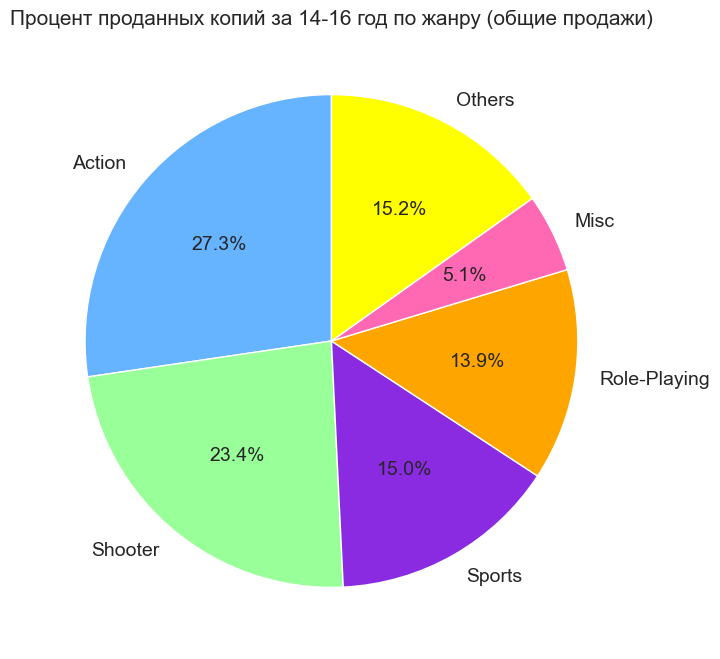

In [60]:
# на основании полученного датафрейма построим круговую диаграмму для отображения доли жанра от общих продаж
plt.figure(figsize=(8, 8))

plt.pie(platform_total_sales['sum'], labels=platform_total_sales.genre, autopct='%1.1f%%'
        , startangle=90, colors=['#66b3ff','#99ff99','#8A2BE2','#FFA500','#FF69B4', '#FFFF00'], textprops={'fontsize': 14})

plt.title('Процент проданных копий за 14-16 год по жанру (общие продажи)', fontsize=15)

plt.show()

Как видно общие обьемы продаж по имеющимся у нас данным распределились следующим образом: больше всего копий игр было продано в жанрах Action, Shooter, Sports, Role-Playing. Данный график показывает сколько было продано копий игр в том или ином жанре для понимания общего обьема продаж, но не говорит нам о большей или меньшей прибыльности того или иного жанра


### Составление портрета пользователя каждого региона

#### Самые популярные платформы (топ-5)

In [61]:
# топ-5 популярных платформ в Японии
platform_jp_sales = data_filtred1.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
platform_jp_sales

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

In [62]:
# топ-5 популярных платформ в Северной Америке
platform_na_sales = data_filtred1.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
platform_na_sales

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [63]:
# топ-5 популярных платформ в Европе
platform_eu_sales = data_filtred1.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
platform_eu_sales

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [64]:
# топ-5 популярных платформ в других регионах
platform_other_sales = data_filtred1.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head()
platform_other_sales

platform
PS4     44.48
XOne    12.52
PS3      9.37
X360     4.35
3DS      3.68
Name: other_sales, dtype: float64

Построим круговые диаграммы для визуализации долей топ 5 платформ для каждого региона

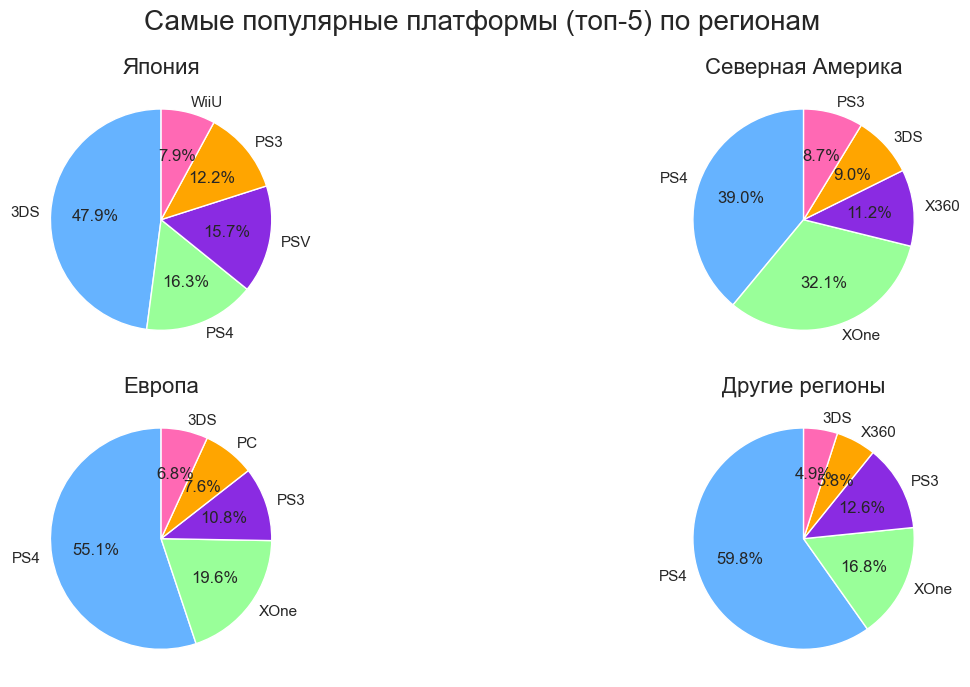

In [65]:
# создадим фигуру и подграфики
fig, axes = plt.subplots(2, 2, figsize=(16, 7))


# первая круговая диаграмма
axes[0, 0].pie(platform_jp_sales, labels=platform_jp_sales.index
               , colors=['#66b3ff','#99ff99','#8A2BE2','#FFA500','#FF69B4', '#FFFF00'], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Япония', fontsize=16)


# вторая круговая диаграмма
axes[0, 1].pie(platform_na_sales, labels=platform_na_sales.index
               , colors=['#66b3ff','#99ff99','#8A2BE2','#FFA500','#FF69B4', '#FFFF00'], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Северная Америка', fontsize=16)


# третья круговая диаграмма
axes[1, 0].pie(platform_eu_sales, labels=platform_eu_sales.index
               , colors=['#66b3ff','#99ff99','#8A2BE2','#FFA500','#FF69B4', '#FFFF00'], autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Европа', fontsize=16)


# четвертая круговая диаграмма
axes[1, 1].pie(platform_other_sales, labels=platform_other_sales.index
               , colors=['#66b3ff','#99ff99','#8A2BE2','#FFA500','#FF69B4', '#FFFF00'], autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Другие регионы', fontsize=16)


# общий заголовок
fig.suptitle('Самые популярные платформы (топ-5) по регионам', fontsize=20)

# установка компактного расположения подграфиков
plt.tight_layout()
plt.show()

Из графиков очевидно следующее: 
- В Северной Америке основные продажи принадлежат Плэйстэйшн и ИксБокс последних поколений. Процент предпочтения данных платформ среди пользователей примерно одинаков (39 против 32). Также большую долю занимают Плэйстэйшн и Иксбокс предыдущих поколений (не все пользователи по тем или иным причинам поменяли свои консоли на новые). 9% от всех продаж занимает платформа 3DS - можно сделать вывод что популярность хендхолд консолей не очень велика и пользователи предпочитают стационарный гейминг мобильному
- Похожая ситуация сложилась в Европе. Первые места также поделили PS4 и XboxOne за тем исключением, что PS4 гораздо популярнее своего основного конкурента (продажи выше более чем в два раза) Предыдущее поколение Плэйстэйшн также присутствует в предпочтениях пользователей, а вот предыдущее поколение Иксбокс в рейтинг не попало, его место занимает PC который отсутствует в рейтинге для Северной Америки. Это можно обьяснить тем, что в Европе для PC преобладает операционная система Windows для которой исторически было больше игр из-за большей распространенности операционной системы в мире и большей легкостью разработки.
- Особняком стоят предпочтения пользователей из Японии. Почти половину всех продаж составляют игры для мобильной платформы 3DS. Можно предположить что это связано с тем, что японцы ведут очень занятый образ жизни, а мобильным устройством можно пользоваться например по пути на работу. Также тк Япония высокотехнологичная страна то у пользователей есть широкий доступ к современным мобильным устройствам и технологиям (стоит отметить что в топ рейтинг популярных платформ попали аж 3 мобильных устройства из 5. Это 3DS, PSV и WiiU) Также небольшую часть рынка занимают PS4 и PS3 примерно в равных долях. А вот Xbox в топ 5 популярных платформ не попал.
- Предпочтения пользователей по платформам для других регионов очень схожи с предпочтениями пользователей из Европы. Большая часть рынка принадлежит PS4 на втором и третьем месте с значительным отставанием XboxOne и PS3. Из мобильного гейминга также как в Европе и Америке пользователи предпочитают Nintendo 3DS

#### Самые популярные жанры (топ-5)

In [66]:
# топ-5 популярных жанров в Японии
genre_jp_sales = data_filtred1.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
genre_jp_sales

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

In [67]:
# топ-5 популярных жанров в Северной Америке
genre_na_sales = data_filtred1.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
genre_na_sales

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [68]:
# топ-5 популярных жанров в Европе
genre_eu_sales = data_filtred1.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
genre_eu_sales

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [69]:
# топ-5 популярных жанров в других регионах
genre_other_sales = data_filtred1.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head()
genre_other_sales

genre
Action          22.57
Shooter         21.53
Sports          14.36
Role-Playing     8.64
Misc             4.03
Name: other_sales, dtype: float64

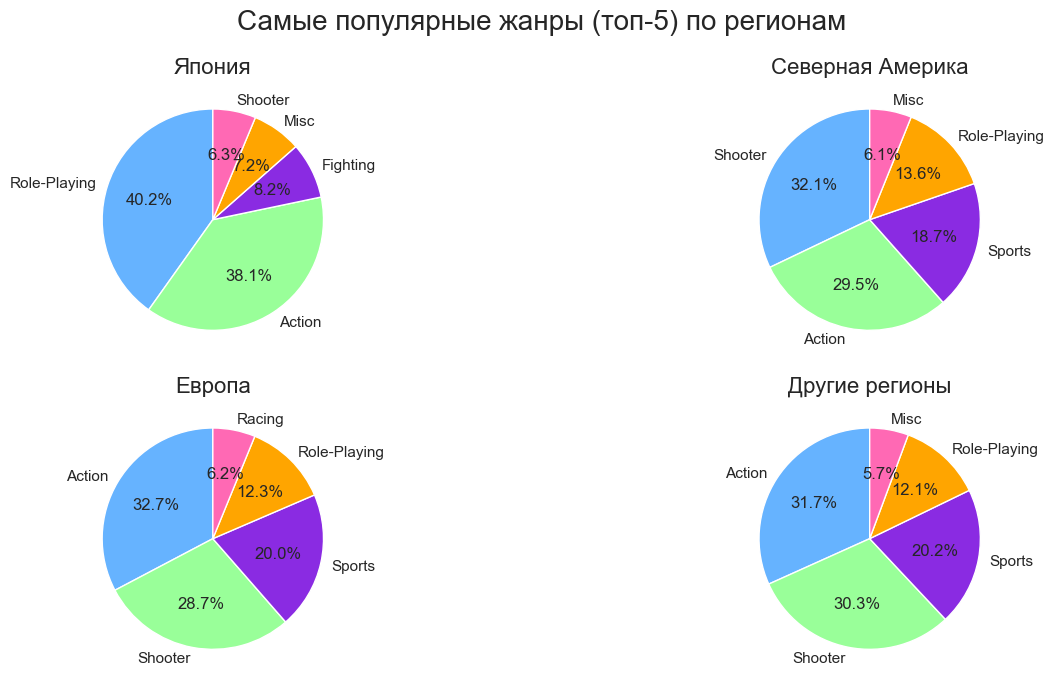

In [70]:
# создадим фигуру и подграфики
fig, axes = plt.subplots(2, 2, figsize=(16, 7))


# первая круговая диаграмма
axes[0, 0].pie(genre_jp_sales, labels=genre_jp_sales.index
               , colors=['#66b3ff','#99ff99','#8A2BE2','#FFA500','#FF69B4', '#FFFF00'], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Япония', fontsize=16)


# вторая круговая диаграмма
axes[0, 1].pie(genre_na_sales, labels=genre_na_sales.index
               , colors=['#66b3ff','#99ff99','#8A2BE2','#FFA500','#FF69B4', '#FFFF00'], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Северная Америка', fontsize=16)


# третья круговая диаграмма
axes[1, 0].pie(genre_eu_sales, labels=genre_eu_sales.index
               , colors=['#66b3ff','#99ff99','#8A2BE2','#FFA500','#FF69B4', '#FFFF00'], autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Европа', fontsize=16)


# четвертая круговая диаграмма
axes[1, 1].pie(genre_other_sales, labels=genre_other_sales.index
               , colors=['#66b3ff','#99ff99','#8A2BE2','#FFA500','#FF69B4', '#FFFF00'], autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Другие регионы', fontsize=16)

# общий заголовок
fig.suptitle('Самые популярные жанры (топ-5) по регионам', fontsize=20)


# установка компактного расположения подграфиков
plt.tight_layout()
plt.show()

Из диаграмм видно следующее:
- за исключением Японии в остальных регионах предпочтения пользователей одинаковы, самые популярные жанры Action, Shooter, Sports, Role-Playing. Эти три категории представлены примерно в равных долях. Небольшое отличие в предпочтениях в Европе - вместо занявшее 5 место в Северной Америке и других регионах жанра Misc (Massively multiplayer online first-person shooter «Массовый многопользовательский шутер от первого лица») в Европе 5 место досталось гоночным играм
- в Японии предпочтения пользователей отданы ролевым играм и шутерам (предпочтения разделены практически поровну). Оставшуюся долю примерно в 22% занимают жанры Shooter, Misc и Fighting примерно в равных долях

#### Влияние рейтинга ESRB на продажи в отдельном регионе

In [71]:
# заполним пропущенные значения столбца rating на Unknown
data_filtred1['rating'] = data_filtred1['rating'].fillna('Unknown')

C:\Users\no_go\AppData\Local\Temp\ipykernel_17508\1731822483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtred1['rating'] = data_filtred1['rating'].fillna('Unknown')


In [72]:
# посчитаем суммарные продажи по каждому рейтингу для каждого региона
raiting_data = data_filtred1.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
raiting_data

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,50.74,58.06,8.94,15.39
E10+,33.23,26.16,4.46,7.83
M,96.42,93.44,8.01,28.67
T,38.95,34.07,14.78,11.33
Unknown,64.72,58.95,56.90,18.40


Text(0, 0.5, 'Продано копий (млн. шт.)')

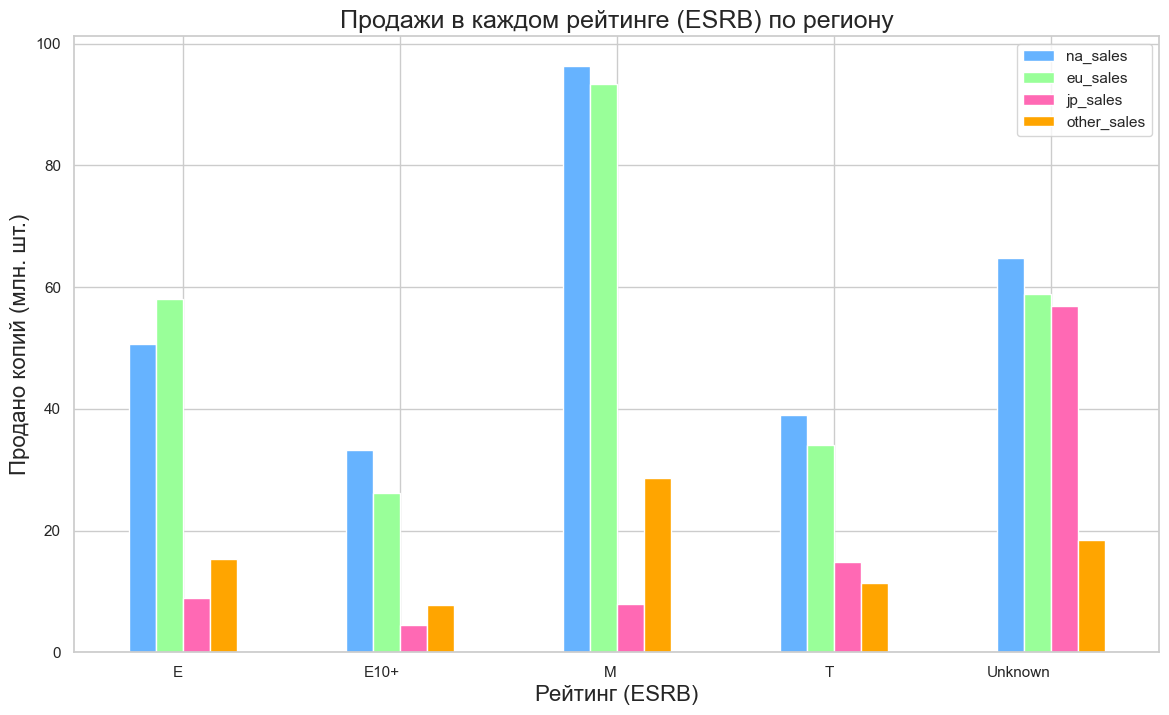

In [73]:
# построим столбчатую диаграмму для наглядной визуализации распределения продаж по рейтингу для каждого региона

ax = raiting_data.plot.bar(color=['#66b3ff','#99ff99','#FF69B4','#FFA500'] , figsize=(14, 8))


# настройка подписей под барами
plt.xticks(rotation=0, ha='right')

# заголовки
plt.title('Продажи в каждом рейтинге (ESRB) по региону', fontsize=18)
plt.xlabel('Рейтинг (ESRB)', fontsize=16)
plt.ylabel('Продано копий (млн. шт.)', fontsize=16)

- **«E» («Everyone»)**  «Для всех»   Содержание вполне подходит для всех возрастов
- **«E10+» («Everyone 10 and older»)** Для всех от 10 лет и старше
- **«M» («Mature»)** «Для взрослых»  Материалы игры не подходят для лиц младше 17 лет
- **«T» («Teen»)** «Подросткам» Игра подходит для лиц от 13 лет
- **«Unknown»** Рейтинг отсутствует, в процессе присвоения и тд.

Как видно из графикасамое малое число проданных игр во всех категориях - это рынок Японии. Это может быть связано с тем, что у нас рейтинги по версии **ESRB** (в задачу которой входит принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в **США и Канаде**) В Японии же действует своя система рейтингов - **Computer Entertainment Rating Organization (CERO).** С этим также связываю большое количество продаж игр в категории "Без рейтинга". Предпочтения пользователей из Северной Америки и Европы в целом схожи - лидируют продажи игр для пользователей старше 17 лет и "Для всех"

### Проверка гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Для проверки используем статистический тест, такой как t-тест для двух независимых выборок.

In [74]:
# год первого релиза для XOne в наших данных
x = df_games_info[df_games_info['platform'] == 'XOne']['year_of_release'].min()

# год первого релиза для PC в наших данных
y = df_games_info[df_games_info['platform'] == 'PC']['year_of_release'].min()

print(f'год первого релиза для XOne - {x}')
print(f'год первого релиза для PC - {y}')

год первого релиза для XOne - 2013
год первого релиза для PC - 1985


In [75]:
# возьмем выборки по отзывам пользователей за выбранный нами актуальный период

data_filtred1.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98


**Сформулируем гипотезы:**

***Нулевая гипотеза (H0):*** Средние пользовательские рейтинги Xbox One не отличаются от средних пользовательских рейтингов PC

***Альтернативная гипотеза (H1):*** Средние пользовательские рейтинги Xbox One отличаются от  средних пользовательских рейтингов пользователей PC.

In [76]:
# подготовим данные для теста  (разделим на отзывы о Xbox One и отзывы о PC)

xone_users = data_filtred1[data_filtred1['platform'] == 'XOne']['user_score'].dropna()

pc_users = data_filtred1[data_filtred1['platform'] == 'PC']['user_score'].dropna()


alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xone_users, pc_users)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Результат говорит о том, что нет оснований считать что средние пользовательские рейтинги Xbox One отличаются от средних пользовательских рейтингов PC

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Для проверки используем статистический тест, такой как t-тест для двух независимых выборок. Возьмем данные за актуальный период 3 года с 2014 по 2016

In [77]:
# подготовим данные для теста
action_data = data_filtred1.query('genre == "Action"')['user_score'].dropna()

sports_data = data_filtred1.query('genre == "Sports"')['user_score'].dropna()

**Сформулируем гипотезы:**

***Нулевая гипотеза (H0):*** Средние пользовательские рейтинги жанра Action не отличается от средних пользовательских рейтингов жанра Sports.

***Альтернативная гипотеза (H1):*** Средние пользовательские рейтинги жанров Action и Sports отличаются

In [78]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action_data, sports_data)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Крайне малое значение p говорит нам о том что есть существенные статистические различия между средними пользовательскими рейтингами жанров Action и Sports. Это означает, что у нас достаточно доказательств для того, чтобы отвергнуть нулевую гипотезу в пользу альтернативной. То есть, средние пользовательские рейтинги жанров Action и Sports действительно отличаются 

### Общий вывод

Имелись данные за период с 1980 по 2016 год из открытых источников о продажах игр, оценках пользователей и экспертов, жанры и платформы с задачей спланировать компанию на 2017 год. Была проведена предобработка данных в ходе которой были заменены пустые значения, удалены дубликаты, добавлен новый столбец с данными. Для последующего анализа принято решение оставить данные за последние три года для сохранения актуальности анализируемой информации. По общим продажам лидируют регионы Северная Америка и Европа (примерно поровну) В три раза меньше продаж приходится на Японию и остальной мир. Самые популярные платформы СА\Европа - PS4 и XOne - лидеры рынка, предыдущее поколение данных приставок также занимали лидирующие положения в этих регионах. Бесспорный лидер рынка PS4 в регионах СА\Европа. Пользователи из Японии больше предпочитают мобильный гейминг и PS4. XOne в данном регионе популярностью не пользуется. Жанровые предпочтения в А\Европа - Shooter/Action/Sport примерно в равных долях. Япония - Role-Playing и Action. Пользователи регионов СА\Европа больше всего предпочитают игры рейтинга М - для взрослых и Е - игры для всех возрастов. Тк для  региона Япония рейтинг ESRB не сильно актуален из-за наличия собственного рейтингово агенства однозначные выводы по зависимости продаж от рейтинга сделать сложно. 

Подитожим. При планировании кампании на 2017 год следует иметь ввиду следующие закономерности, особенности и тенденции: 
- Самые популярные платформы PS4 и XOne
- Популярность данных платформ предыдущих поколений сокращается
- Пользователи региона Северная Америка\Европа отдают предпочтение PS4 и XOne а также мобильному геймингу в виде 3DS (который представлен незначительно) Игры с рейтингом М - для взрослых и Е - игры для всех возрастов имеют большую вероятность высоких продаж из-за их популярности в данных регионах. Самые популярные жанры - Action, Shooter, Sport. Самые прибыльные - Shooter и Sports. Самые неприбыльные жанры - Puzzle, Adventure, Strategy.
- При планировании региона Япония отдельно стоит учесть особенности местного менталитета и сделать больший акцент на мобильный гейминг. На рейтинги в данном регионе не стоит полностью полагаться из-за неинформативности. Самые популярные платформы 3DS, PS4, PSV. Жанры - Role-Playing и Action.
- Картина по другим регионам в целом повторяет картину в  регионах Северная Америка\Европа.
